# Projet : Classification du Diagnostic du Cancer du Sein à l'Aide de Modèles de Machine Learning


### Réalisé par : ABRKAOUI ABDELLAH & CHRAMI ILYAS -- Filière IISE - Groupe 1

## 1- Collection et Exploration des Données

### a- l'importation des bibliothèques : pandas, numpy, matplotlib et seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


### b- lecture et Stockage des données de "Breast Cancer" à partir d'un fichier CSV dans un objet nommé "data".

In [2]:
data = pd.read_csv('Breast Cancer Wisconsin (Diagnostic) Data.csv')

## savoir les dimensions de data
data.shape # 569 lignes et 33 colonnes

(569, 33)

### c- affichage de premier 5 lignes de dataframe "data"

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 2- Prétraitement des Données

### a- Affichage des informations sur le DataFrame "data",les types de données, les valeurs non nulles...

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### b- Affichage des noms des colonnes du DataFrame "data".

In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### c : Calculons le nombre de valeurs nulles dans chaque colonne du DataFrame "shoes_dataset".

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### d- Vérifions si il ya des valeurs dupliqué

In [7]:
data.duplicated().sum()

0

### e- Normalisation des données

#### ---> supprimons les deux columns Id et Unnamed: 32


In [8]:
data = data.drop(columns=['id','Unnamed: 32'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#### ---> savoir si il y a des valeur 0 dans notre dataset

In [9]:
zero_values = (data == 0).any()
print(zero_values)

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean              True
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se                True
concave points_se           True
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst             True
concave points_worst        True
symmetry_worst             False
fractal_di

In [10]:
## remplacer les valeur nuls par la moyen des valeur de la colonne concerné

columns_with_zeros = ['concavity_mean', 'concave points_mean', 'concavity_se', 
                      'concave points_se', 'concavity_worst', 'concave points_worst']

# Remplacer les zéros par la moyenne de chaque colonne concernée
for column in columns_with_zeros:
    data[column] = data[column].replace(0, data[column].mean())

In [11]:
zero_values = (data == 0).any()
print(zero_values)
## et voila tous les colonne n'ont pas des valeurs nulls

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

#### ---> Savoir et Visualisation le nombre de chaque tumeurs

In [12]:
## stocker les diagnosis dans un variable

diagnosis = data['diagnosis'].value_counts().reset_index()

diagnosis

,diagnosis,count
0,B,357
1,M,212


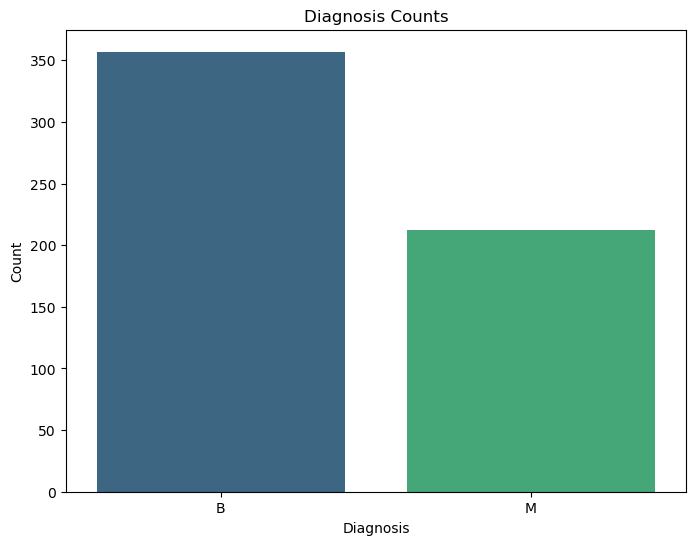

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x='diagnosis', y='count', data=diagnosis, palette='viridis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Counts')
plt.show()

### f- Séparer et stocker les Features et Le Target dans des Variables X et Y

### --> 30 Features stocké dans X

In [14]:
X = data.drop(columns='diagnosis',axis=1)
X


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.138900,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.410700,0.221600,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.321500,0.162800,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.053020,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.340300,0.141800,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.351400,0.152000,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.938700,0.265000,0.4087,0.12400


### ---> le Target diagnosis stocké dans Y

In [15]:
## ici on remplaçant les valeurs "M" par 1 (pour Maligne) et les valeurs "B" par 0 (pour Bénigne)
data.diagnosis= [1 if i =="M" else 0 for i in data.diagnosis]
Y = data['diagnosis']
Y
## M = 1, B = 0


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## 3- Construction et Entraînement des Modèles

#### a- l'implémentation de l'algorithme KNN

In [16]:
#Modèle KNN
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33, random_state=6)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

## l'entrainement de modèle
clf.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

#### b- l'implémentation de l'algorithme de classification logistique

In [17]:
#Modèle de classification logistique
from sklearn.linear_model import LogisticRegression

#model trine
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=100)

## l'entrainement de modèle
model.fit(X, Y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

#### c- l'implémentation de l'algorithme de SVM

In [18]:
#Modèle de SVM
from sklearn.svm import SVC
# Initialiser et entraîner le modèle SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=0)

## l'entrainement de modèle
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

#### d- l'implémentation de l'algorithme des arbres de décision

In [19]:
# Modéle des arbres de décision
from sklearn.tree import DecisionTreeClassifier
# Initialiser et entraîner le modèle d'arbres de décision
dt_model = DecisionTreeClassifier(random_state=0)

## l'entrainement de modèle
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## 5- Évaluation des Modèles

#### a- Évaluation des performances des modèles sur l'ensemble de test à l'aide de mesures telles que la précision, le rappel, le score F1,

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Prédire les classes sur l'ensemble de test pour les 3 modèles
knn_predictions = clf.predict(X_test)
logistic_predictions = model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)


# Calculer les mesures de performance pour chaque modèle
##KNN
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')

##Logistic
logistic_precision = precision_score(y_test, logistic_predictions, average='weighted')
logistic_recall = recall_score(y_test, logistic_predictions, average='weighted')
logistic_f1 = f1_score(y_test, logistic_predictions, average='weighted')

##SVM
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

##Arbre de décision
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

# Afficher les mesures de performance
print("KNN - Précision :", knn_precision)
print("KNN - Rappel :", knn_recall)
print("KNN - Score F1 :", knn_f1)
print("\n")
print("Régression Logistique - Précision :", logistic_precision)
print("Régression Logistique - Rappel :", logistic_recall)
print("Régression Logistique - Score F1 :", logistic_f1)
print("\n")
print("SVM - Précision :", svm_precision)
print("SVM - Rappel :", svm_recall)
print("SVM - Score F1 :", svm_f1)
print("\n")
print("Arbre de décision - Précision :", dt_precision)
print("Arbre de décision - Rappel :", dt_recall)
print("Arbre de décision - Score F1 :", dt_f1)

KNN - Précision : 0.9630821306353221
KNN - Rappel : 0.9627659574468085
KNN - Score F1 : 0.9626720710687506


Régression Logistique - Précision : 0.984477756286267
Régression Logistique - Rappel : 0.9840425531914894
Régression Logistique - Score F1 : 0.9840023161723218


SVM - Précision : 0.9650522583053378
SVM - Rappel : 0.9627659574468085
SVM - Score F1 : 0.9625148681509454


Arbre de décision - Précision : 0.925875447152043
Arbre de décision - Rappel : 0.925531914893617
Arbre de décision - Score F1 : 0.9252724743462716


#### b- Comparaison des performances des différents modèles.

Score de précision du modèle KNN : 0.9627659574468085
Score de précision du modèle de régression logistique : 0.9840425531914894
Score de précision du modèle SVM : 0.9627659574468085
Score de précision du modèle Arbre de Décision : 0.925531914893617


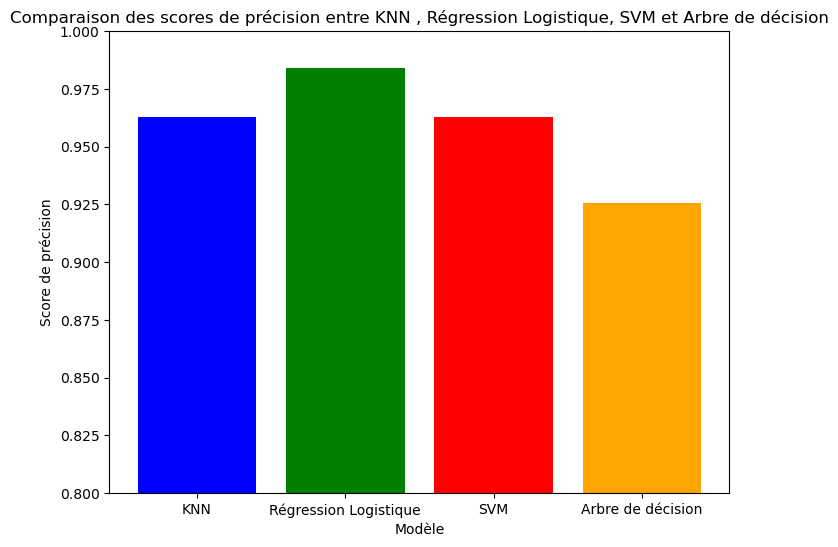

In [21]:
# Calculer les scores de précision pour chaque modèle sur l'ensemble de test
knn_score = clf.score(X_test, y_test)
logistic_score = model.score(X_test, y_test)
svm_score = svm_model.score(X_test, y_test)
dt_score = dt_model.score(X_test, y_test)


# Afficher les scores de précision
print("Score de précision du modèle KNN :", knn_score)
print("Score de précision du modèle de régression logistique :", logistic_score)
print("Score de précision du modèle SVM :", svm_score)
print("Score de précision du modèle Arbre de Décision :", dt_score)


import matplotlib.pyplot as plt

# Scores de précision pour chaque modèle
modele_names = ['KNN', 'Régression Logistique','SVM','Arbre de décision']
scores = [knn_score, logistic_score,svm_score,dt_score]

# Création du diagramme à barres
plt.figure(figsize=(8, 6))
plt.bar(modele_names, scores, color=['blue', 'green','red','orange'])
plt.xlabel('Modèle')
plt.ylabel('Score de précision')
plt.title('Comparaison des scores de précision entre KNN , Régression Logistique, SVM et Arbre de décision')
plt.ylim(0.8, 1)  # Limiter l'axe y pour une meilleure visualisation
plt.show()

## 6- Interprétation des Résultats

#### a- les caractéristiques qui influent le plus sur la prédiction du diagnostic du cancer du sein selon le modèles logistique.

In [22]:
# Afficher les coefficients attribués à chaque caractéristique

coefficients = model.coef_[0]
feature_names = data.columns[1:] 
feature_coefficients = dict(zip(feature_names, coefficients))
sorted_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

for feature, coefficient in sorted_coefficients:
    print(f"Caractéristique : {feature}, Coefficient : {coefficient}")

Caractéristique : radius_mean, Coefficient : -3.872592833293051
Caractéristique : concavity_worst, Coefficient : 3.0692834097414914
Caractéristique : texture_se, Coefficient : -2.624588755215501
Caractéristique : compactness_worst, Coefficient : 2.086055474610709
Caractéristique : symmetry_worst, Coefficient : 1.6987096207935906
Caractéristique : concave points_worst, Coefficient : 1.501652114074991
Caractéristique : concavity_mean, Coefficient : 1.318368468981453
Caractéristique : radius_worst, Coefficient : -1.2542027857411806
Caractéristique : concave points_mean, Coefficient : 0.7800196745790251
Caractéristique : compactness_mean, Coefficient : 0.7659966268999869
Caractéristique : smoothness_worst, Coefficient : 0.7221002550651823
Caractéristique : symmetry_mean, Coefficient : 0.5700514165984197
Caractéristique : texture_worst, Coefficient : 0.5160003024017376
Caractéristique : perimeter_mean, Coefficient : 0.43505119454500824
Caractéristique : smoothness_mean, Coefficient : 0.3861

#### b- les caractéristiques qui influent le plus sur la prédiction du diagnostic du cancer du sein selon le modèles SVM

In [23]:
# Afficher les coefficients attribués à chaque caractéristique
coefficients = svm_model.coef_[0]
feature_names = data.columns[1:] 
feature_coefficients = dict(zip(feature_names, coefficients))
sorted_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

for feature, coefficient in sorted_coefficients:
    print(f"Caractéristique : {feature}, Coefficient : {coefficient}")

Caractéristique : concavity_worst, Coefficient : 1.4505913230842373
Caractéristique : symmetry_worst, Coefficient : 0.883101562187738
Caractéristique : compactness_worst, Coefficient : 0.633710273122514
Caractéristique : concave points_worst, Coefficient : 0.6300127217541713
Caractéristique : texture_se, Coefficient : -0.5303556623159814
Caractéristique : concavity_mean, Coefficient : 0.5291353198035192
Caractéristique : smoothness_worst, Coefficient : 0.43445362613065197
Caractéristique : symmetry_mean, Coefficient : 0.37302765654375286
Caractéristique : radius_mean, Coefficient : -0.34826859959437506
Caractéristique : concave points_mean, Coefficient : 0.3340969581547045
Caractéristique : texture_worst, Coefficient : 0.25291826288344765
Caractéristique : smoothness_mean, Coefficient : 0.23552345298949912
Caractéristique : perimeter_mean, Coefficient : 0.21639298402220675
Caractéristique : radius_worst, Coefficient : 0.15034872867009597
Caractéristique : perimeter_se, Coefficient : 0.

#### c-  Visualisation des caractéristiques les plus importantes pour la classification des tumeurs

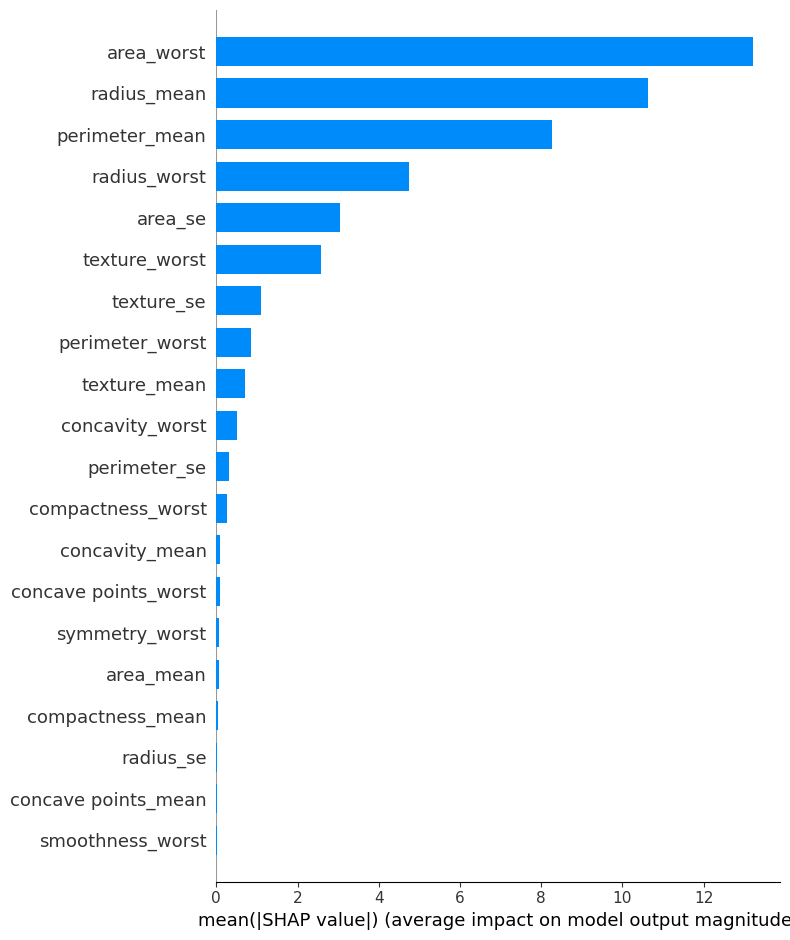

In [29]:
import shap
# Initialiser l'explainer SHAP avec le modèle
explainer = shap.Explainer(model, X)

# Calculer les valeurs SHAP pour l'ensemble des données
shap_values = explainer.shap_values(X)

# Tracer le summary plot SHAP
shap.summary_plot(shap_values, X, feature_names=data.columns[1:], plot_type='bar')

In [30]:
from joblib import dump

# Save each model to a separate file
dump(clf, 'knn_model.pkl')

['knn_model.pkl']

In [31]:
from joblib import load

# Load each model from its respective file
loaded_knn_model = load('knn_model.pkl')

In [32]:
loaded_predictions = loaded_knn_model.predict(X_test)
loaded_predictions

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)